Importing libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Function for power law transformation

In [2]:
# s = c * r ^ gamma
def power_law_transform(image, gamma):
    c = 255.0
    power_law_image = image.copy()
    height, width = image.shape

    for row in range(height):
        for col in range(width):
            pixel = image[row][col] / c     # pixel value range 0.0 to 1.0
            power_law_image[row][col] = c * (pixel ** gamma)

    return power_law_image

Function for Logarithmic transformation

In [3]:
def log_transform(image):
    log_image = image.copy()
    height, width = image.shape

    c = 255.0 / np.log10(1 + image.max())
    for row in range(height):
        for col in range(width):
            r = image[row][col]     # r is input pixel
            log_image[row][col] = c * np.log10(1 + r)

    return log_image

Function for Inverse Logarithmic Transformation

In [4]:
def inverse_log_transform(image):
    height, width = image.shape
    inverse_log_image = image.copy()

    c = 255.0 / np.log10(1 + image.max())
    for row in range(height):
        for col in range(width):
            r = image[row][col]     # r is input pixel
            inverse_log_image[row][col] = (10 ** (r / c)) - 1

    return inverse_log_image

Loading original image

In [5]:
original_image1 = cv2.imread('./images/city.png', 0)
original_image1 = cv2.resize(original_image1, (512, 512))

original_image2 = cv2.imread('./images/einstein.jpeg', 0)
original_image2 = cv2.resize(original_image2, (512, 512))

original_image3 = cv2.imread('./images/Einstain_white.jpg', 0)
original_image3 = cv2.resize(original_image3, (512, 512))

Displaying power law transformation image with different value of gamma

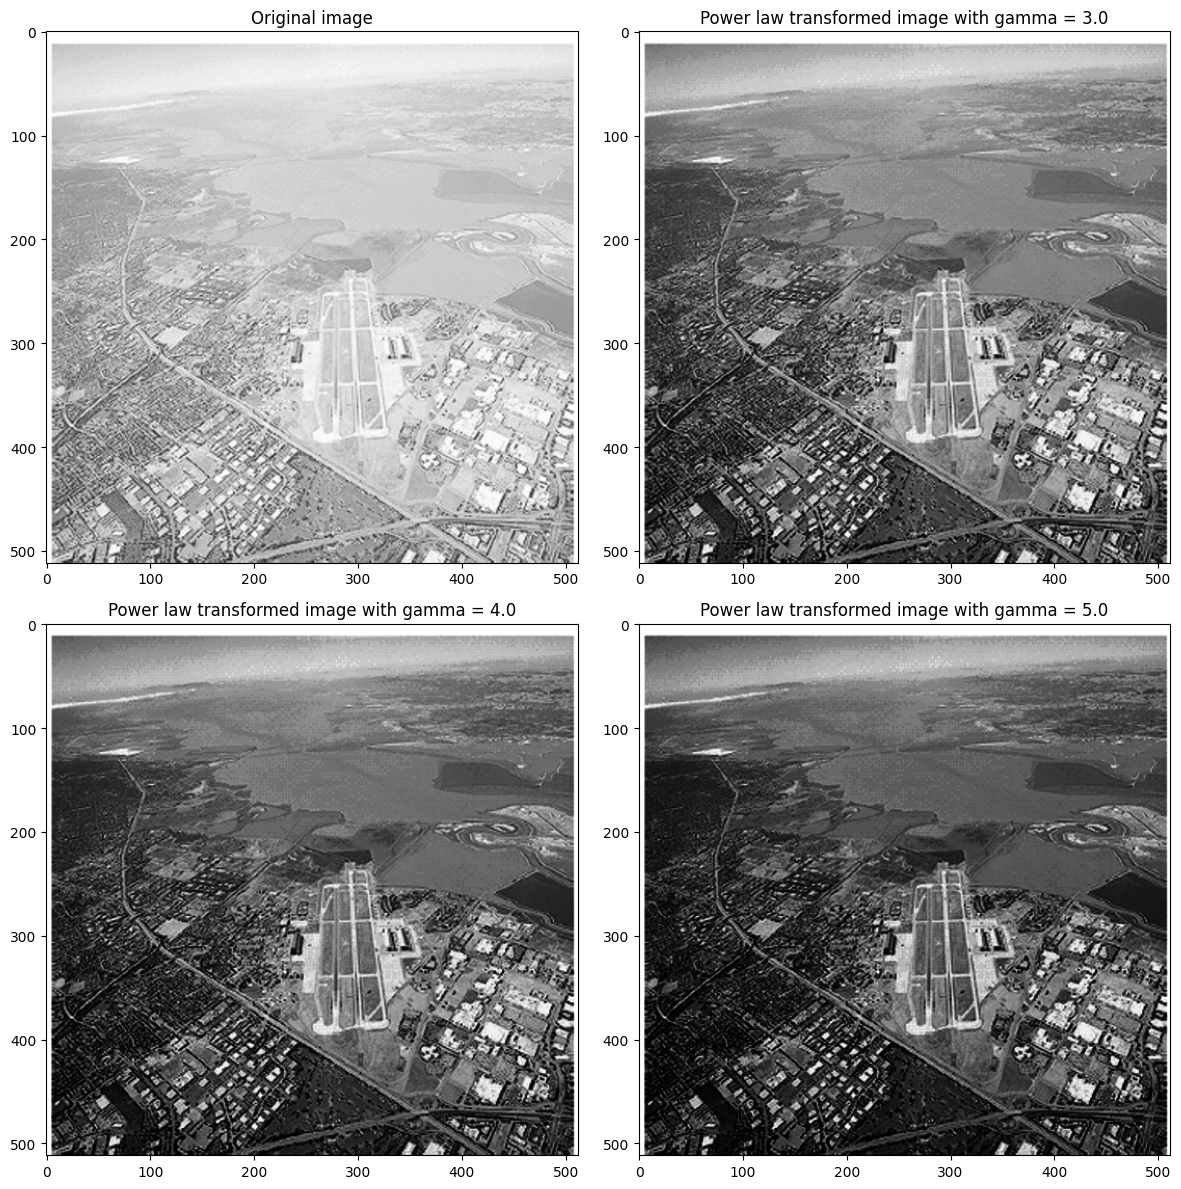

In [6]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(original_image1, cmap='gray')
plt.title('Original image')

gamma = [3.0, 4.0, 5.0]
for i in range(len(gamma)):
    power_law_image = power_law_transform(original_image1, gamma[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(power_law_image, cmap='gray')
    plt.title(f'Power law transformed image with gamma = {gamma[i]}')

plt.tight_layout()
plt.show()


Displaing Logarithmic Transformation Image

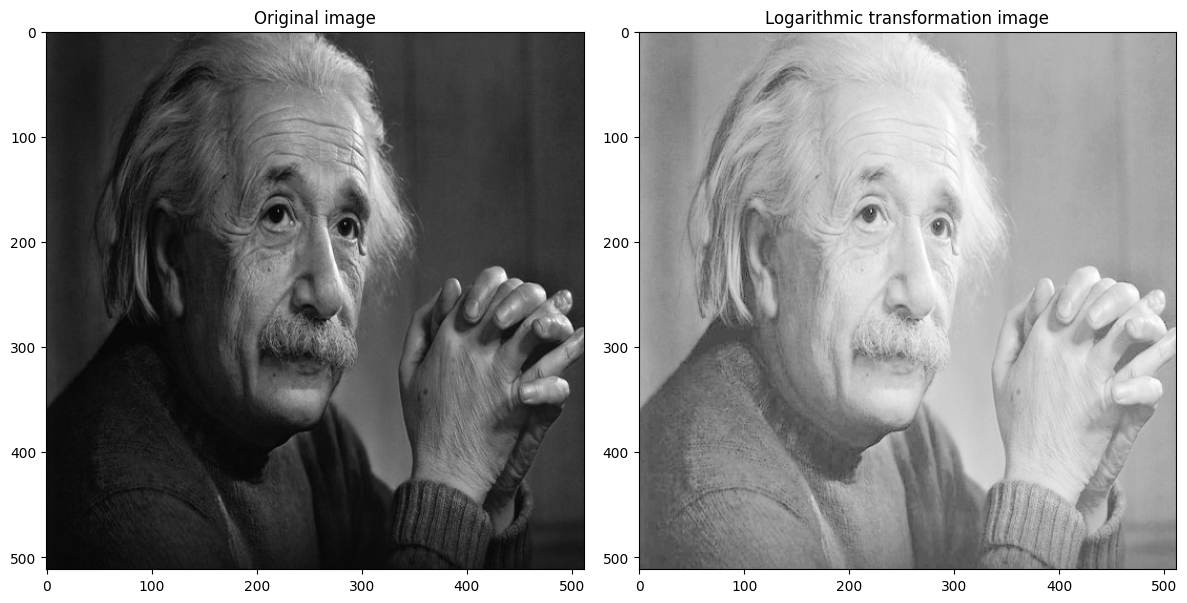

In [7]:
log_image = log_transform(original_image2)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(original_image2, cmap='gray')
plt.title('Original image')

plt.subplot(1, 2, 2)
plt.imshow(log_image, cmap='gray')
plt.title('Logarithmic transformation image')

plt.tight_layout()
plt.show()

Displaying Inverse Logarithmic Transformation Image

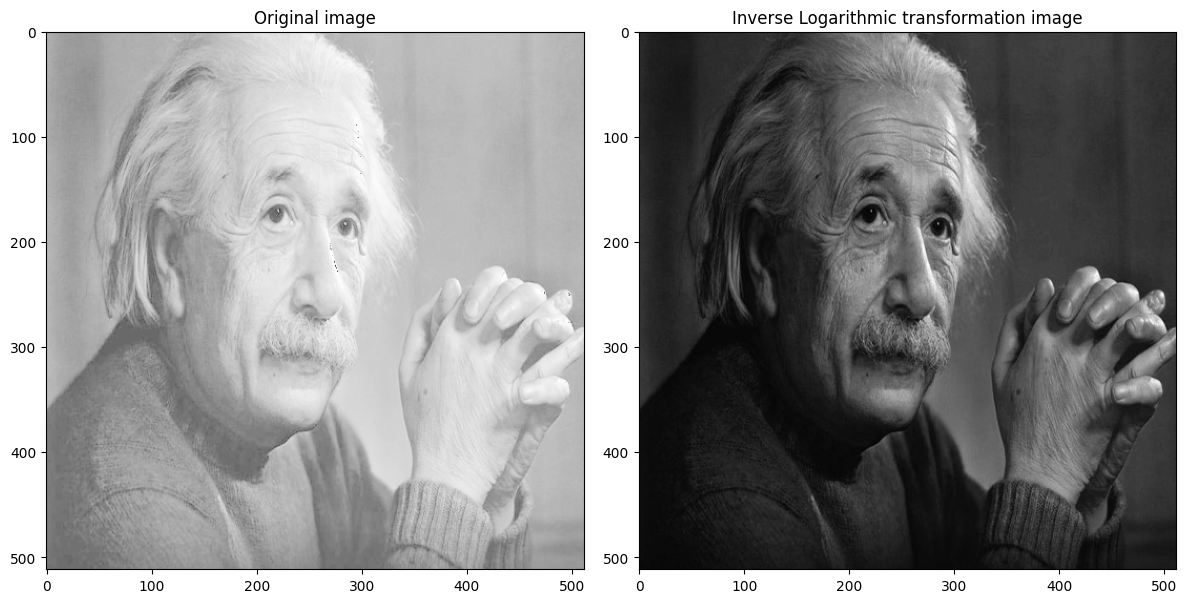

In [8]:
inverse_log_image = inverse_log_transform(log_image)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(original_image3, cmap='gray')
plt.title('Original image')

plt.subplot(1, 2, 2)
plt.imshow(inverse_log_image, cmap='gray')
plt.title('Inverse Logarithmic transformation image')

plt.tight_layout()
plt.show()